<a href="https://colab.research.google.com/github/pratikbasnet2075/Clustering/blob/main/k_Means_Clustering_for_Arbitrary_Features_with_k_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Centroids:
 [[4.25       4.65       3.86666667 4.25      ]
 [2.05       2.25       1.85       2.05      ]
 [1.15       1.55       0.8125     1.1875    ]]
WCSS: 0.6420833333333336


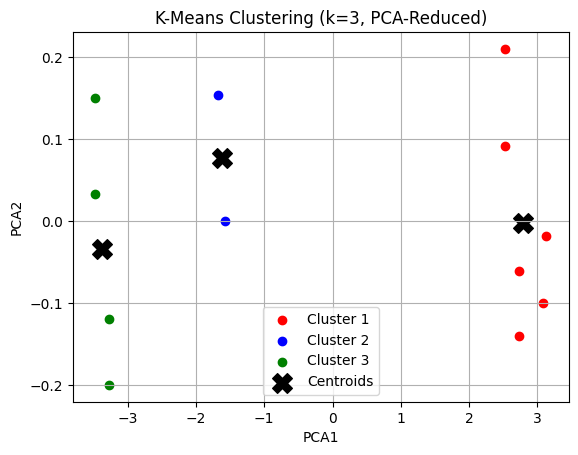

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dataset (f1, f2, f3, f4)
data = np.array([
    [1.0, 1.5, 0.8, 1.2],
    [1.2, 1.7, 0.9, 1.1],
    [1.1, 1.4, 0.7, 1.3],
    [1.3, 1.6, 0.85, 1.15],
    [4.0, 4.5, 3.8, 4.2],
    [4.2, 4.7, 3.9, 4.1],
    [4.1, 4.4, 3.7, 4.3],
    [4.3, 4.6, 3.85, 4.15],
    [2.0, 2.2, 1.8, 2.1],
    [2.1, 2.3, 1.9, 2.0],
    [4.5, 4.8, 4.0, 4.4],
    [4.4, 4.9, 3.95, 4.35]
])

# Parameters
k = 3
epochs = 100

# Random initialization
np.random.seed(42)
centroids = data[np.random.choice(len(data), k, replace=False)]

for epoch in range(epochs):
    # Assign clusters
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Compute WCSS
wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in range(k))
print("Final Centroids:\n", centroids)
print("WCSS:", wcss)

# Visualization using PCA (2D projection)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

# Plot clusters
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(data_2d[labels == i][:, 0], data_2d[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=3, PCA-Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()